In [7]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [11]:
data_dir = "D:\\LSBF\\Sem 2\\AIMV\\Data\\Intel images\\seg_train\\seg_train"
data_dir

'D:\\LSBF\\Sem 2\\AIMV\\Data\\Intel images\\seg_train\\seg_train'

In [13]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/LSBF/Sem 2/AIMV/Data/Intel images/seg_train/seg_train')

In [15]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('D:/LSBF/Sem 2/AIMV/Data/Intel images/seg_train/seg_train/buildings/0.jpg'),
 WindowsPath('D:/LSBF/Sem 2/AIMV/Data/Intel images/seg_train/seg_train/buildings/10006.jpg'),
 WindowsPath('D:/LSBF/Sem 2/AIMV/Data/Intel images/seg_train/seg_train/buildings/1001.jpg'),
 WindowsPath('D:/LSBF/Sem 2/AIMV/Data/Intel images/seg_train/seg_train/buildings/10014.jpg'),
 WindowsPath('D:/LSBF/Sem 2/AIMV/Data/Intel images/seg_train/seg_train/buildings/10018.jpg')]

In [17]:
# Make dictionary of the images

nature_images_dict = {
    'bld': list(data_dir.glob('buildings/*')),
    'fst': list(data_dir.glob('forest/*')),
    'glc': list(data_dir.glob('glacier/*')),
    'mnt': list(data_dir.glob('mountain/*')),
    'se': list(data_dir.glob('sea/*')),
    'str': list(data_dir.glob('streat/*')),
}

In [19]:
# make dictionary of the lables of images

nature_labels_dict = {
    'bld': 0,
    'fst': 1,
    'glc': 2,
    'mnt': 3,
    'se': 4,
    'str': 5 
}

In [21]:
# Initialize empty lists to store features (X) and labels (y)
X, y = [], []

# Iterate over each nature category and its corresponding images
for nature_name, images in nature_images_dict.items():
    for image in images:
        # Read the image from file
        img = cv2.imread(str(image))
        
        # Resize the image to a fixed size (180x180 pixels)
        resized_img = cv2.resize(img, (180, 180))
        
        # Append the resized image to the features list (X)
        X.append(resized_img)
        
        # Append the corresponding label to the labels list (y)
        y.append(nature_labels_dict[nature_name])

In [23]:
X = np.array(X)
y = np.array(y)

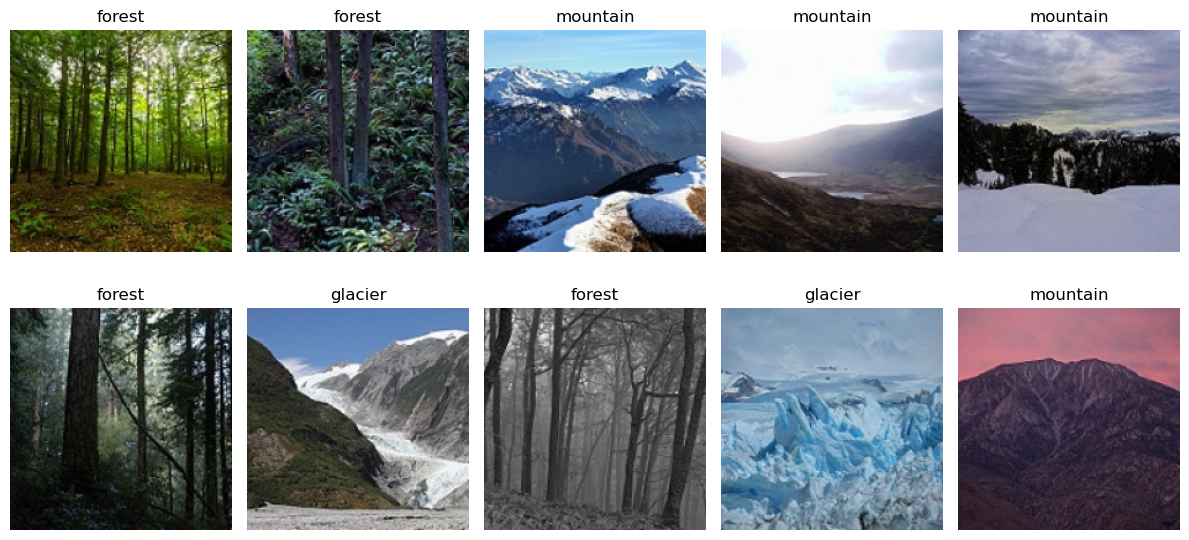

In [25]:
# Generate random indices to select 10 images
random_indices = np.random.choice(len(X), size=10, replace=False)


class_names= {
    0 : 'building',
    1 : 'forest',
    2 : 'glacier',
    3 : 'mountain',
    4 : 'sea',
    5 : 'street'
}

# Display the randomly selected images with class names
plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)  # Create a 2x5 grid of subplots
    plt.imshow(cv2.cvtColor(X[idx], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    label_index = y[idx]  # Get the label index
    class_name = class_names[label_index]  # Get the class name from class_names dictionary
    plt.title(class_name)  # Display the class name as the title
    plt.axis('off')  # Hide the axes for clarity

plt.tight_layout()
plt.show()  # Show the plot

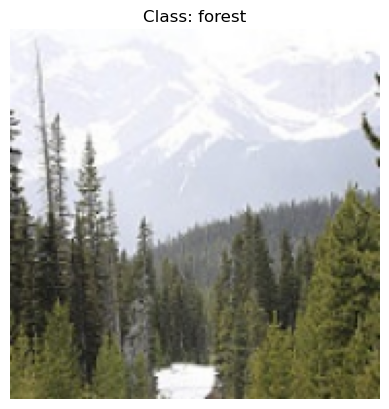

Pixel values of the image at index 2222:
[[[252 250 249]
  [254 252 251]
  [255 253 252]
  ...
  [254 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 252 251]
  [254 252 251]
  [252 250 249]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 252 251]
  [254 251 250]
  [253 250 249]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 43  94  94]
  [ 55 107 107]
  [ 62 114 115]
  ...
  [ 45  90  93]
  [ 49  95  97]
  [ 44  92  94]]

 [[ 59 111 111]
  [ 63 115 115]
  [ 62 114 115]
  ...
  [ 41  86  90]
  [ 52  98 101]
  [ 32  80  82]]

 [[ 60 112 112]
  [ 58 110 110]
  [ 44  97  98]
  ...
  [ 62 107 111]
  [ 71 117 119]
  [ 44  92  94]]]


In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Choose an index to display its image and pixel values
index_to_display = np.random.randint(len(X))  # Choose a random index or specify one

# Display the image
plt.imshow(cv2.cvtColor(X[index_to_display], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.title(f'Class: {class_names[y[index_to_display]]}')  # Display the class name as the title
plt.axis('off')  # Hide the axes for clarity
plt.show()

# Print the pixel values of the image
print(f'Pixel values of the image at index {index_to_display}:')
print(X[index_to_display])

In [29]:
# Import the train_test_split function from the sklearn library
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X: The features (images)
# y: The labels
# random_state=0: Ensures reproducibility by setting a seed for the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
 # Scale the training and testing datasets by dividing by 255
# This step normalizes the pixel values to be in the range [0, 1]

# Scale the training set features
X_train_scaled = X_train / 255.0

# Scale the testing set features
X_test_scaled = X_test / 255.0

# After this, X_train_scaled and X_test_scaled will have pixel values between 0 and 1

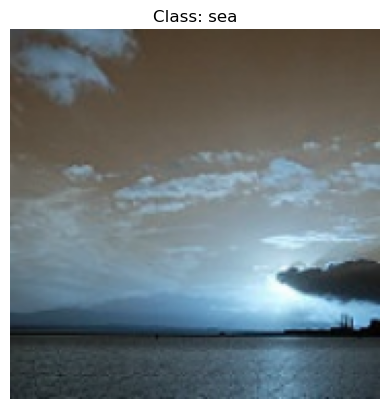

Scaled pixel values of the image at index 2748:
[[[0.28235294 0.28627451 0.30196078]
  [0.2745098  0.27843137 0.29411765]
  [0.2745098  0.27843137 0.29803922]
  ...
  [0.30196078 0.24313725 0.18039216]
  [0.30196078 0.24313725 0.18039216]
  [0.30196078 0.24313725 0.18039216]]

 [[0.27843137 0.28627451 0.29411765]
  [0.27058824 0.27843137 0.28627451]
  [0.27058824 0.27843137 0.28235294]
  ...
  [0.30588235 0.24705882 0.18431373]
  [0.30588235 0.24705882 0.18431373]
  [0.30588235 0.24705882 0.18431373]]

 [[0.28235294 0.28627451 0.29019608]
  [0.27058824 0.27843137 0.27843137]
  [0.27058824 0.2745098  0.2745098 ]
  ...
  [0.30980392 0.25098039 0.18823529]
  [0.30588235 0.24705882 0.18823529]
  [0.30588235 0.24705882 0.18823529]]

 ...

 [[0.14901961 0.17254902 0.18823529]
  [0.15686275 0.18039216 0.2       ]
  [0.14117647 0.16862745 0.18039216]
  ...
  [0.18431373 0.22352941 0.24705882]
  [0.20392157 0.23921569 0.25882353]
  [0.20784314 0.23921569 0.2627451 ]]

 [[0.14901961 0.17647059 0

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Choose an index to display its image and scaled pixel values
index_to_display = np.random.randint(len(X))

# Display the image
plt.imshow(X_train_scaled[index_to_display])  # Display the image directly since it's already scaled
plt.title(f'Class: {class_names[y_train[index_to_display]]}')  # Display the class name as the title
plt.axis('off')  # Hide the axes for clarity
plt.show()

# Print the scaled pixel values of the image
print(f'Scaled pixel values of the image at index {index_to_display}:')
print(X_train_scaled[index_to_display])

In [35]:
num_classes = 6

# CNN model building
model = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),  # Convolutional layer
    layers.MaxPooling2D(2, 2),  # Pooling layer
    layers.Dropout(0.25),  # Dropout layer
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),  # Convolutional layer
    layers.MaxPooling2D(2, 2),  # Pooling layer
    layers.Dropout(0.25),  # Dropout layer

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),  # Convolutional layer
    layers.MaxPooling2D(2, 2),  # Pooling layer
    layers.Dropout(0.25),  # Dropout layer

    layers.Flatten(),  # Flatten layer
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout layer
    layers.Dense(num_classes, activation='softmax')  # Output layer
])

In [37]:
model.summary() # summary of the model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [41]:
history = model.fit(
    X_train,         # Training data
    y_train,         # Training labels
    epochs=20,       # Number of epochs to train the model
    batch_size=32,   # Number of samples per batch
    validation_split=0.2  # Fraction of the training data to be used as validation data
)

# The history object will contain information about the training process, such as the loss and accuracy for each epoch

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 106s 450ms/step - accuracy: 0.1982 - loss: 151.3231 - val_accuracy: 0.3352 - val_loss: 1.6328
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 99s 453ms/step - accuracy: 0.3964 - loss: 1.4517 - val_accuracy: 0.4857 - val_loss: 1.3466
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 101s 463ms/step - accuracy: 0.4525 - loss: 1.3083 - val_accuracy: 0.5469 - val_loss: 1.1565
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 107s 486ms/step - accuracy: 0.4894 - loss: 1.2199 - val_accuracy: 0.5441 - val_loss: 1.1318
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 99s 454ms/step - accuracy: 0.5047 - loss: 1.1705 - val_accuracy: 0.5492 - val_loss: 1.0793
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 97s 444ms/step - accuracy: 0.5011 - loss: 1.1538 - val_accuracy: 0.5629 - val_loss: 1.0395
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 98s 446ms/step - accuracy: 0.5086 - loss: 1.1270 - val_accuracy: 0.5641 - val_loss: 1.0410
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 98s 449ms/step - accuracy: 0.5187 - lo

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the scaled test data
predictions = model.predict(X_test_scaled)

# Directly get the predicted class index for the first sample
predicted_class = np.argmax(predictions[0])

# Compare with the true label of the first test sample
true_class = y_test[0]  # If y_test is not one-hot encoded

# Check if the prediction matches the true class
if predicted_class == true_class:
    # Display the image using matplotlib
    plt.imshow(X_test[0], cmap='gray')  # Adjust the colormap as needed (e.g., 'gray' for grayscale images)
    plt.title(f'Predicted Class: {predicted_class}, True Class: {true_class}')
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print(f'Prediction does not match the true class. Predicted: {predicted_class}, True: {true_class}')